# Block 6 Exercise 1: Non-Linear Classification

## MNIST Data
We return to the MNIST data set on handwritten digits to compare non-linear classification algorithms ...   

In [20]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

In [21]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [22]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

In [23]:
X.min()

0.0

In [5]:
#look at max/min value in the data
X.max()

pixel1       0.0
pixel2       0.0
pixel3       0.0
pixel4       0.0
pixel5       0.0
            ... 
pixel780    62.0
pixel781     0.0
pixel782     0.0
pixel783     0.0
pixel784     0.0
Length: 784, dtype: float64

### E1.1: Cross-Validation and Support Vector Machines
Train and optimize  C-SVM classifier on MNIST (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* use a RBF kernel
* use *random search* with cross-validation to find the best settings for *gamma* and *C* (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

pip = make_pipeline(StandardScaler(), SVC(kernel='rbf', max_iter=50))
distributions = dict(svc__C=uniform(loc=1, scale=10),svc__gamma=[0.0001,0.001,0.01,1])

clf = RandomizedSearchCV(pip, distributions, random_state=0, n_jobs=-1, n_iter=10)
search = clf.fit(X, y)
%store search

Stored 'search' (RandomizedSearchCV)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [2]:
%store -r search
search.best_params_

{'svc__C': 6.4881350392732475, 'svc__gamma': 0.001}

### E1.2: Pipelines and simple Neural Networks
Split the MNIST data into  train- and test-sets and then train and evaluate a simple Multi Layer Perceptron (MLP) network. Since the non-linear activation functions of MLPs are sensitive to the scaling on the input (recall the *sigmoid* function), we need to scale all input values to [0,1] 

* combine all steps of your training in a SKL pipeline (https://scikit-learn.org/stable/modules/compose.html#pipeline)
* use a SKL-scaler to scale the data (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* MLP Parameters: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
    * use a *SGD* solver
    * use *tanh* as activation function
    * compare networks with 1, 2 and 3 layers, use different numbers of neurons per layer
    * adjust training parameters *alpha* (regularization) and *learning rate* - how sensitive is the model to these parameters?
    * Hint: do not change all parameters at the same time, split into several experiments
* How hard is it to find the best parameters? How many experiments would you need to find the best parameters?
    

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### 1 Layer NN

In [9]:
pip_1_layer = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', hidden_layer_sizes=(88,), max_iter=100))
pip_1_layer.fit(X_train, y_train)
%store pip_1_layer


Stored 'pip_1_layer' (Pipeline)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
%store -r pip_1_layer 
pred_1_layer = pip_1_layer.predict(X_test)
print(f'F1: {f1_score(y_test, pred_1_layer, average="micro")}')

F1: 0.9514857142857143


#### 2 Layer NN

In [11]:
pip_2_layer = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', hidden_layer_sizes=(88,44), max_iter=100))
pip_2_layer.fit(X_train, y_train)
%store pip_2_layer

Stored 'pip_2_layer' (Pipeline)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [12]:
%store -r pip_2_layer 
pred_2_layer = pip_2_layer.predict(X_test)
print(f'F1: {f1_score(y_test, pred_2_layer, average="micro")}')

F1: 0.9568571428571429


#### 3 Layer NN

In [13]:
pip_3_layer = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', hidden_layer_sizes=(88,44,22), max_iter=100))
pip_3_layer.fit(X_train, y_train)
%store pip_3_layer

Stored 'pip_3_layer' (Pipeline)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
%store -r pip_3_layer 
pred_3_layer = pip_3_layer.predict(X_test)
print(f'F1: {f1_score(y_test, pred_3_layer, average="micro")}')

F1: 0.9546285714285714


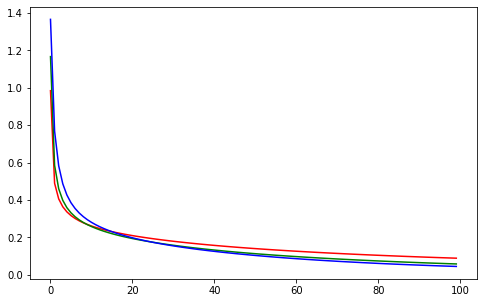

In [1]:
%store -r pip_1_layer 
%store -r pip_2_layer 
%store -r pip_3_layer 

import matplotlib.pyplot as plt
plt.figure(num = 3, figsize=(8, 5))
x1 = range(0, len(pip_1_layer[1].loss_curve_))
x2 = range(0, len(pip_2_layer[1].loss_curve_))
x3 = range(0, len(pip_3_layer[1].loss_curve_))
plt.plot(x1, pip_1_layer[1].loss_curve_, color='red')
plt.plot(x2, pip_2_layer[1].loss_curve_, color='green')
plt.plot(x3, pip_3_layer[1].loss_curve_, color='blue')
plt.show()

Die Anzahl der Layer hat keinen signifikaten Einfluss auf den F1 Score. Der Loss steigt mit steigender Anzahl Layer marginal.

#### Alpha Optimization

In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {'mlpclassifier__alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}
pip_alpha_opti = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', max_iter=100))
clf_alpha_opti = GridSearchCV(pip_alpha_opti, parameters, n_jobs= 6)
clf_alpha_opti.fit(X_train, y_train)
%store clf_alpha_opti

Stored 'clf_alpha_opti' (GridSearchCV)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
%store -r clf_alpha_opti 
pred_alpha_opti= clf_alpha_opti.predict(X_test)
print(f'F1: {f1_score(y_test, pred_alpha_opti, average="micro")}')
print(f'Best alpha {clf_alpha_opti.best_params_}')

F1: 0.9542857142857143
Best alpha {'mlpclassifier__alpha': 0.3}


In [16]:
import pandas as pd
%store -r clf_alpha_opti
alpha_df = pd.DataFrame.from_dict(clf_alpha_opti.cv_results_)
alpha_df.sort_values('rank_test_score')[['rank_test_score', 'param_mlpclassifier__alpha','mean_test_score']]

,rank_test_score,param_mlpclassifier__alpha,mean_test_score
6,1,0.3,0.949200
8,2,0.5,0.949181
5,3,0.2,0.949048
7,4,0.4,0.949029
4,5,0.1,0.948895
0,6,0.00001,0.948533
1,6,0.0001,0.948533
3,6,0.01,0.948533
2,9,0.001,0.948514


Der Parameter Alpha hat fast keinen Einfluss auf das Modell

#### LR Optimization

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'mlpclassifier__learning_rate_init':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4 , 0.5]}
pip_lr_opti = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', max_iter=100))
clf_lr_opti = GridSearchCV(pip_alpha_opti, parameters, n_jobs= 6)
clf_lr_opti.fit(X_train, y_train)
%store clf_lr_opti

Stored 'clf_lr_opti' (GridSearchCV)


In [25]:
%store -r clf_lr_opti
pred_lr_opti= clf_lr_opti.predict(X_test)
print(f'F1: {f1_score(y_test, pred_lr_opti, average="micro")}')
print(f'Best alpha {clf_lr_opti.best_params_}')

F1: 0.9644
Best alpha {'mlpclassifier__learning_rate_init': 0.1}


In [19]:
import pandas as pd
%store -r clf_lr_opti
lr_df = pd.DataFrame.from_dict(clf_lr_opti.cv_results_)
lr_df.sort_values('rank_test_score')[['rank_test_score', 'param_mlpclassifier__learning_rate_init','mean_test_score']]

,rank_test_score,param_mlpclassifier__learning_rate_init,mean_test_score
4,1,0.1,0.962133
5,2,0.2,0.960114
3,3,0.01,0.959410
6,4,0.3,0.955333
7,5,0.4,0.952229
2,6,0.001,0.948533
8,7,0.5,0.946533
1,8,0.0001,0.910190
0,9,0.00001,0.823905


Der Parameter Learning Rate hat einen großen Einfluss auf das Modell

#### Modell mit optimierten Parametern

In [19]:
%store -r clf_alpha_opti
%store -r clf_lr_opti
pip = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh', max_iter=100,
                                                    alpha=clf_alpha_opti.best_params_.get('mlpclassifier__alpha'),
                                                    learning_rate_init=clf_lr_opti.best_params_.get('mlpclassifier__learning_rate_init')))
pip.fit(X_train, y_train)
%store pip

Stored 'pip' (Pipeline)


In [20]:
%store -r pip
pred = pip.predict(X_test)
print(f'F1: {f1_score(y_test, pred, average="micro")}')

F1: 0.9670285714285715



#### Modell mit default Parametern für Benchmark

In [22]:
default_pip = make_pipeline(StandardScaler(), MLPClassifier(random_state=1, solver='sgd', activation='tanh'))
default_pip.fit(X_train, y_train)
%store default_pip

Stored 'default_pip' (Pipeline)


c:\users\lutz\documents\github\datascience21\block_6\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
%store -r default_pip
default_pred = default_pip.predict(X_test)
print(f'F1: {f1_score(y_test, default_pred, average="micro")}')

F1: 0.9594857142857143


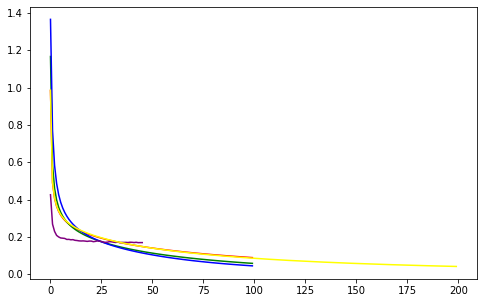

In [24]:
%store -r pip_1_layer 
%store -r pip_2_layer 
%store -r pip_3_layer 
%store -r pip
%store -r default_pip
import matplotlib.pyplot as plt
plt.figure(num = 3, figsize=(8, 5))
x1 = range(0, len(pip_1_layer[1].loss_curve_))
x2 = range(0, len(pip_2_layer[1].loss_curve_))
x3 = range(0, len(pip_3_layer[1].loss_curve_))
x4 = range(0, len(pip[1].loss_curve_))
x5 = range(0, len(default_pip[1].loss_curve_))
plt.plot(x1, pip_1_layer[1].loss_curve_, color='red')
plt.plot(x2, pip_2_layer[1].loss_curve_, color='green')
plt.plot(x3, pip_3_layer[1].loss_curve_, color='blue')
plt.plot(x4, pip[1].loss_curve_, color='purple')
plt.plot(x5, default_pip[1].loss_curve_, color='yellow')
plt.show()

Durch die Parameter Optimierung lässt sich der F1 Score um cira. 1.5 gegenüber den default Settings steigern.
Außerdem waren weit weniger Iterationen nötig. Die besten Parameter zu finden ist nahezu unmöglich. Mit genügend
Rechenleistung lässt sich vermutlich immer eine etwas bessere Parameterkonstellation finden. In einem nächsten Schritt
könnte man eine erneute Suche mit einem kleineren Wertebereich um die aktuell besten Parameter anwenden. Vorher
sollte aber ein Ziel gesetzt werden welcher Score erreicht werden soll und ab welcher minimalen Änderung man mit der optimierung
stoppt. Hyperparameter dienen eher dem Finetuning. Eine signifikate Verbesserung lässt sich in der Regel nur durch bessere
Daten und Features erreichen.